# DETECCIÓN DE COMUNIDADES EN REDDIT

#### Importing libraries

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


#### Load the dataset

In [5]:
# In case is loaded from a local file
path_to_dataset = './soc-redditHyperlinks-title-5000.tsv'

# In case is loaded from a remote file
# path_to_dataset = 'https://raw.githubusercontent.com/oliverTuesta/reddit-communities/main/soc-redditHyperlinks-title-5000.tsv'

data = pd.read_csv(path_to_dataset, delimiter='\t')
# Display the first few rows of the dataset
data.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."


#### Creating of the graph G and showing basic analysis of the data

In [6]:
# Create a directed graph from the dataset
G = nx.from_pandas_edgelist(data, source='SOURCE_SUBREDDIT', target='TARGET_SUBREDDIT', edge_attr=True, create_using=nx.DiGraph())

# Basic analysis
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 5000
Number of edges: 9613


**Creating a graph of the first 50 nodes of G**

In [7]:
# Get the first 50 nodes
first_n_nodes = list(G.nodes)[:20]

# Create a subgraph with the first 20 nodes and their edges
subgraphG = G.subgraph(first_n_nodes)

**Graphing my 20 nodes graph**

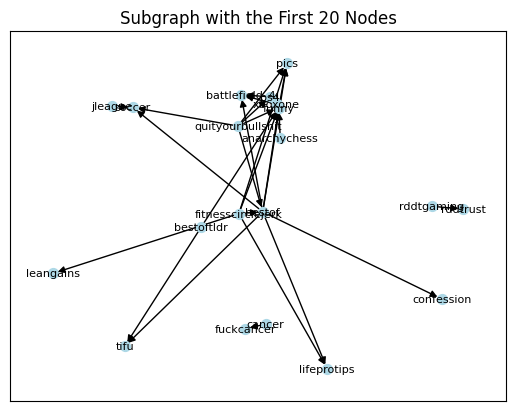

<Figure size 200000x200000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
pos = nx.spring_layout(subgraphG, seed=10)
nx.draw_networkx(subgraphG, pos, with_labels=True, node_size=50, node_color='lightblue', font_size=8)
plt.title("Subgraph with the First 20 Nodes")
# maximaze the size of the plot
plt.figure(figsize=(2000, 2000))
# download the plot
plt.show()